In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import seaborn as sns
import re

In [2]:
df1 = pd.read_csv("../input/valorant-masters-2021-player-map-data/banned_maps_stats.csv", usecols = ['Map','Total'])
df1

,Map,Total
0,Ascent,2
1,Bind,9
2,Haven,3
3,Icebox,8
4,Split,12


In [3]:
df1.rename(columns = {
    'Total' : 'Total_banned'
}, inplace = True)
df1

,Map,Total_banned
0,Ascent,2
1,Bind,9
2,Haven,3
3,Icebox,8
4,Split,12


In [4]:
df2 = pd.read_csv("../input/valorant-masters-2021-player-map-data/map_pick_stats.csv",usecols = ['Map','Total'])
df2

,Map,Total
0,Ascent,16
1,Bind,9
2,Haven,15
3,Icebox,10
4,Split,6


In [5]:
df2.rename(columns = {
    'Total' : 'Total_picked'
}, inplace = True)
df2

,Map,Total_picked
0,Ascent,16
1,Bind,9
2,Haven,15
3,Icebox,10
4,Split,6


In [6]:
df3= pd.read_csv("../input/valorant-masters-2021-player-map-data/player_stats.csv")
df3.head()

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,TenZ,Canada,Sentinels,"['Jett', 'Reyna', 'Raze']",9,206,139,55,1.48,1.87,289,22.8,15.4,6.1
1,ScreaM,Belgium,Team Liquid,"['Sage', 'Phoenix']",9,177,131,56,1.35,1.77,265,19.6,14.5,6.2
2,ShahZaM,United States,Sentinels,"['Sova', 'Jett']",9,172,134,52,1.28,1.67,240,19.1,14.8,5.7
3,L1NK,United Kingdom,Team Liquid,"['Brimstone', 'Omen']",9,147,123,57,1.19,1.65,218,16.3,13.6,6.3
4,Jamppi,Finland,Team Liquid,"['Jett', 'Killjoy']",9,155,130,32,1.19,1.43,229,17.2,14.4,3.5


In [7]:
df4 = pd.read_csv("../input/valorant-masters-2021-player-map-data/side_pick_stats.csv")
df4

,Map,Atk Wins,Def Wins
0,Ascent,96,130
1,Bind,74,55
2,Haven,130,105
3,Icebox,99,88
4,Split,44,53


In [8]:
df5 = [df1,df2,df4]
df5

[      Map  Total_banned
 0  Ascent             2
 1    Bind             9
 2   Haven             3
 3  Icebox             8
 4   Split            12,
       Map  Total_picked
 0  Ascent            16
 1    Bind             9
 2   Haven            15
 3  Icebox            10
 4   Split             6,
       Map  Atk Wins  Def Wins
 0  Ascent        96       130
 1    Bind        74        55
 2   Haven       130       105
 3  Icebox        99        88
 4   Split        44        53]

In [9]:
df6 = pd.merge(df1,df2,on = "Map")
df6

,Map,Total_banned,Total_picked
0,Ascent,2,16
1,Bind,9,9
2,Haven,3,15
3,Icebox,8,10
4,Split,12,6


In [10]:
df = pd.merge(df6,df4, on="Map")
df

,Map,Total_banned,Total_picked,Atk Wins,Def Wins
0,Ascent,2,16,96,130
1,Bind,9,9,74,55
2,Haven,3,15,130,105
3,Icebox,8,10,99,88
4,Split,12,6,44,53


In [11]:
'''img = mpimg.imread("Valorant-Masters-Logo-747x420.png")
img'''

'img = mpimg.imread("Valorant-Masters-Logo-747x420.png")\nimg'

In [12]:
#img.size

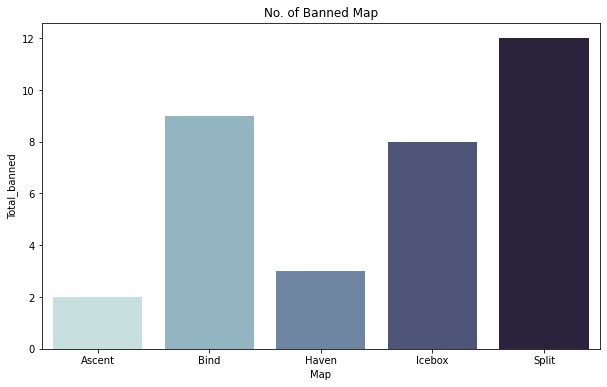

In [13]:
plt.figure(figsize = (10,6))
plt.title("No. of Banned Map")
sns.barplot(x="Map",y = "Total_banned",data=df, palette= "ch:start=.2,rot=-.3")
plt.show()

In [14]:
'''plt.figure(figsize = (10,6))
fig, ax = plt.subplots()
plt.title("No. of Banned Map")
plt.xticks(rotation=90)
sns.barplot(x="Map",y = "Total_banned",data=df, palette= "ch:s=-.2,r=.6")
ax.imshow(img, extent=[-3,6, 0, 14])
plt.show()'''

'plt.figure(figsize = (10,6))\nfig, ax = plt.subplots()\nplt.title("No. of Banned Map")\nplt.xticks(rotation=90)\nsns.barplot(x="Map",y = "Total_banned",data=df, palette= "ch:s=-.2,r=.6")\nax.imshow(img, extent=[-3,6, 0, 14])\nplt.show()'

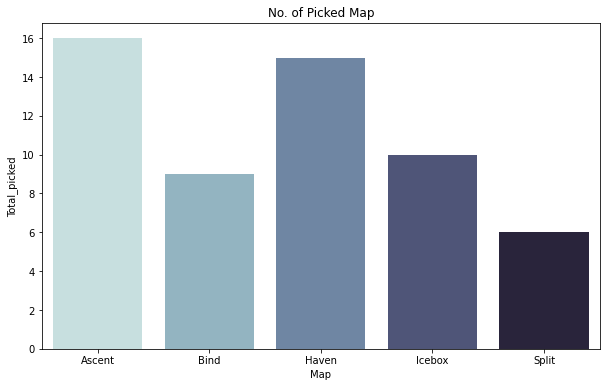

In [15]:
plt.figure(figsize = (10,6))
plt.title("No. of Picked Map")
sns.barplot(x="Map",y = "Total_picked",data=df, palette= "ch:start=.2,rot=-.3")
plt.show()

In [16]:
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from PIL import Image

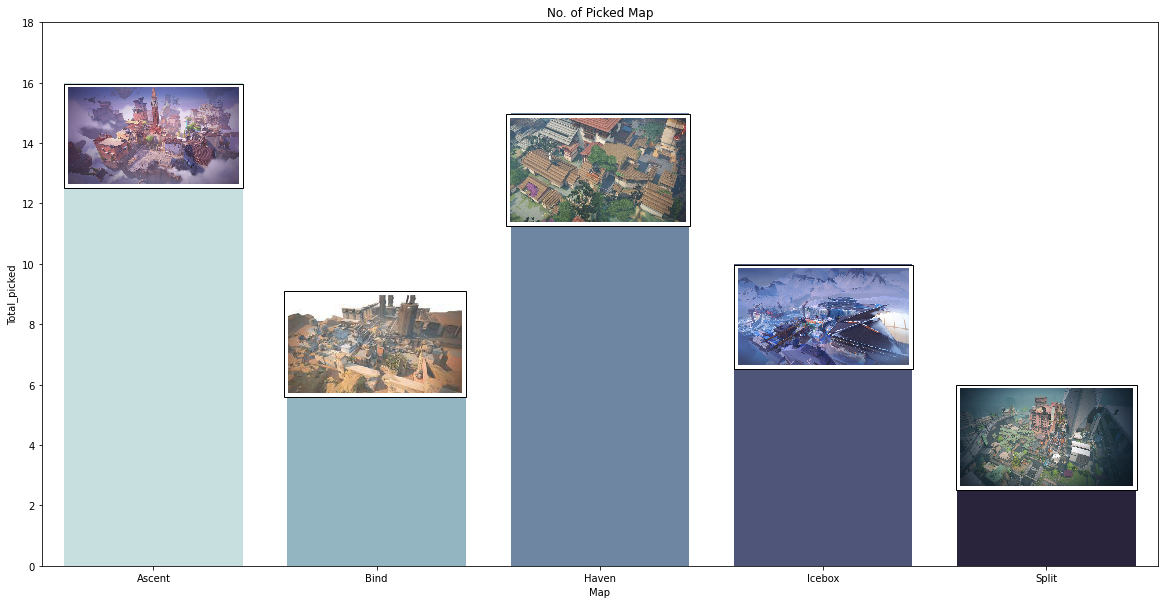

In [17]:
fig,ax = plt.subplots()
ax.set_ylim(0,18)
fig.set_figheight(10)
fig.set_figwidth(20)
plt.title("No. of Picked Map")
sns.barplot(x="Map",y = "Total_picked",data=df, palette= "ch:start=.2,rot=-.3")

# ascent
ascentlogo = Image.open('../input/inputspics/Loading_Screen_Ascent.png')
imagebox_ascent = OffsetImage(ascentlogo, zoom = 0.089,)
y = [0,16]
ab_ascentlogo = AnnotationBbox(imagebox_ascent, y, xybox=(0,-53), boxcoords = 'offset points')
ax.add_artist(ab_ascentlogo)

#bind
bindlogo = Image.open('../input/inputspics/Bind.png')
imagebox_bind = OffsetImage(bindlogo, zoom = 0.58,)
y = [0,8]
ab_bindlogo = AnnotationBbox(imagebox_bind, y, xybox=(222,-20), boxcoords = 'offset points')
ax.add_artist(ab_bindlogo)

#Heaven

heavenlogo = Image.open('../input/inputspics/Heaven.png')
imagebox_heaven = OffsetImage(heavenlogo, zoom = 0.22,)
y = [0,14]
ab_heavenlogo = AnnotationBbox(imagebox_heaven, y, xybox=(445,-27), boxcoords = 'offset points')
ax.add_artist(ab_heavenlogo)

#Icebox

iceboxlogo = Image.open('../input/inputspics/Loading_Icebox.png')
imagebox_icebox = OffsetImage(iceboxlogo, zoom = 0.089,)
y = [0,10]
ab_iceboxlogo = AnnotationBbox(imagebox_icebox, y, xybox=(670,-53), boxcoords = 'offset points')
ax.add_artist(ab_iceboxlogo)

#split

splitlogo = Image.open('../input/inputspics/Loading_Screen_Split.png')
imagebox_split = OffsetImage(splitlogo, zoom = 0.090,)
y = [0,6]
ab_splitlogo = AnnotationBbox(imagebox_split, y, xybox=(893,-53), boxcoords = 'offset points')
ax.add_artist(ab_splitlogo)

plt.show()

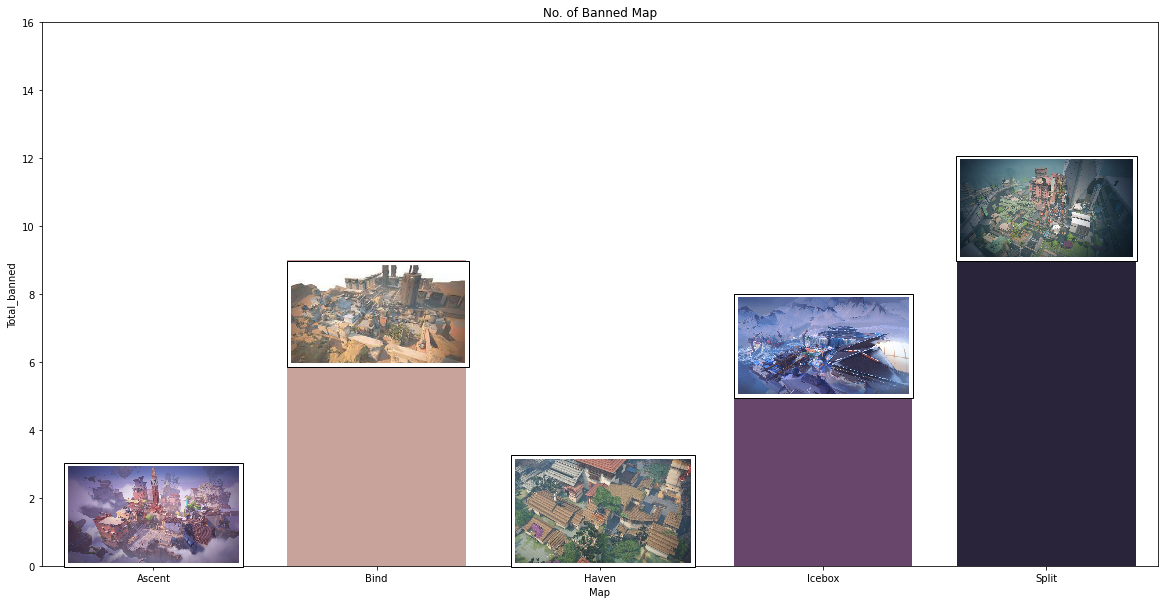

In [18]:
fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
ax.set_ylim(0,16)
sns.barplot(x="Map",y = "Total_banned",data=df, palette= "ch:s=-.2,r=.6")
# ascent
ascentlogo = Image.open('../input/inputspics/Loading_Screen_Ascent.png')
imagebox_ascent = OffsetImage(ascentlogo, zoom = 0.089,)
y = [0,2]
plt.title("No. of Banned Map")
ab_ascentlogo = AnnotationBbox(imagebox_ascent, y, xybox=(0,-17), boxcoords = 'offset points')
ax.add_artist(ab_ascentlogo)

#bind
bindlogo = Image.open('../input/inputspics/Bind.png')
imagebox_bind = OffsetImage(bindlogo, zoom = 0.58,)
y = [0,9]
ab_bindlogo = AnnotationBbox(imagebox_bind, y, xybox=(225,-54), boxcoords = 'offset points')
ax.add_artist(ab_bindlogo)

#Heaven

heavenlogo = Image.open('../input/inputspics/Heaven.png')
imagebox_heaven = OffsetImage(heavenlogo, zoom = 0.22,)
y = [0,3]
ab_heavenlogo = AnnotationBbox(imagebox_heaven, y, xybox=(450,-47), boxcoords = 'offset points')
ax.add_artist(ab_heavenlogo)

#Icebox

iceboxlogo = Image.open('../input/inputspics/Loading_Icebox.png')
imagebox_icebox = OffsetImage(iceboxlogo, zoom = 0.089,)
y = [0,8]
ab_iceboxlogo = AnnotationBbox(imagebox_icebox, y, xybox=(670,-52), boxcoords = 'offset points')
ax.add_artist(ab_iceboxlogo)

#split

splitlogo = Image.open('../input/inputspics/Loading_Screen_Split.png')
imagebox_split = OffsetImage(splitlogo, zoom = 0.090,)
y = [0,12]
ab_splitlogo = AnnotationBbox(imagebox_split, y, xybox=(893,-50), boxcoords = 'offset points')
ax.add_artist(ab_splitlogo)

plt.show()

In [19]:
df3.head()

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,TenZ,Canada,Sentinels,"['Jett', 'Reyna', 'Raze']",9,206,139,55,1.48,1.87,289,22.8,15.4,6.1
1,ScreaM,Belgium,Team Liquid,"['Sage', 'Phoenix']",9,177,131,56,1.35,1.77,265,19.6,14.5,6.2
2,ShahZaM,United States,Sentinels,"['Sova', 'Jett']",9,172,134,52,1.28,1.67,240,19.1,14.8,5.7
3,L1NK,United Kingdom,Team Liquid,"['Brimstone', 'Omen']",9,147,123,57,1.19,1.65,218,16.3,13.6,6.3
4,Jamppi,Finland,Team Liquid,"['Jett', 'Killjoy']",9,155,130,32,1.19,1.43,229,17.2,14.4,3.5


In [20]:
df3.dtypes

Player      object
Country     object
Team        object
Agents      object
Maps         int64
K            int64
D            int64
A            int64
KD         float64
KDA        float64
ACS/Map      int64
K/Map      float64
D/Map      float64
A/Map      float64
dtype: object

In [21]:
df3.Agents.astype("string").head()

0    ['Jett', 'Reyna', 'Raze']
1          ['Sage', 'Phoenix']
2             ['Sova', 'Jett']
3        ['Brimstone', 'Omen']
4          ['Jett', 'Killjoy']
Name: Agents, dtype: string

In [22]:
df3.Agents.str.split(",").head()

0    [['Jett',  'Reyna',  'Raze']]
1           [['Sage',  'Phoenix']]
2              [['Sova',  'Jett']]
3         [['Brimstone',  'Omen']]
4           [['Jett',  'Killjoy']]
Name: Agents, dtype: object

In [23]:
df3.Agents.value_counts(sort = False).head()

['Omen', 'Astra']             2
['Astra', 'Viper', 'Omen']    1
['Jett', 'Phoenix']           1
['Sage', 'Phoenix']           1
['Jett', 'Sage']              1
Name: Agents, dtype: int64

In [24]:
Topfive=df3.sort_values(by="KDA", ascending=False).head()
Topfive

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,TenZ,Canada,Sentinels,"['Jett', 'Reyna', 'Raze']",9,206,139,55,1.48,1.87,289,22.8,15.4,6.1
1,ScreaM,Belgium,Team Liquid,"['Sage', 'Phoenix']",9,177,131,56,1.35,1.77,265,19.6,14.5,6.2
7,Mistic,United Kingdom,Fnatic,"['Viper', 'Skye']",16,240,206,120,1.16,1.74,191,15.0,12.8,7.5
2,ShahZaM,United States,Sentinels,"['Sova', 'Jett']",9,172,134,52,1.28,1.67,240,19.1,14.8,5.7
3,L1NK,United Kingdom,Team Liquid,"['Brimstone', 'Omen']",9,147,123,57,1.19,1.65,218,16.3,13.6,6.3


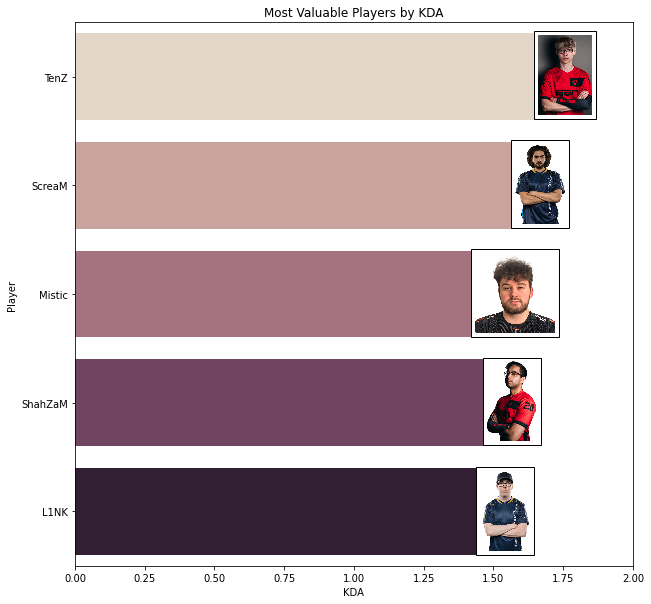

In [25]:
#fig = plt.figure(figsize = (16,8))
fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)

ax.set_xlim(0,2)
plt.title("Most Valuable Players by KDA")
sns.barplot(x="KDA",y = "Player",data=Topfive, palette= "ch:start=.2")

#Tenz
tenzlogo = Image.open('../input/inputspics/Sentinels_TenZ_may_2021.png')
imagebox_tenz = OffsetImage(tenzlogo, zoom = 0.1,)
x = [0,1.87]
ab_tenzlogo = AnnotationBbox(imagebox_tenz, x, xybox=(490,205), boxcoords = 'offset points')
ax.add_artist(ab_tenzlogo)

#Scream
screamlogo = Image.open('../input/inputspics/Scream.png')
imagebox_scream = OffsetImage(screamlogo, zoom = 0.224,)
x = [0,1.77]
ab_screamlogo = AnnotationBbox(imagebox_scream, x, xybox=(465,85), boxcoords = 'offset points')
ax.add_artist(ab_screamlogo)

#Mistic
misticlogo = Image.open('../input/inputspics/Mistic.png')
imagebox_mistic = OffsetImage(misticlogo, zoom = 0.20,)
x = [0,1.74]
ab_misticlogo = AnnotationBbox(imagebox_mistic, x, xybox=(440,-27), boxcoords = 'offset points')
ax.add_artist(ab_misticlogo)

#Shazam
shazamlogo = Image.open('../input/inputspics/Shazam.png')
imagebox_shazam = OffsetImage(shazamlogo, zoom = 0.223,)
x = [0,1.67]
ab_shazamlogo = AnnotationBbox(imagebox_shazam, x, xybox=(437,-143), boxcoords = 'offset points')
ax.add_artist(ab_shazamlogo)

#Link
linklogo = Image.open('../input/inputspics/Link.png')
imagebox_link = OffsetImage(linklogo, zoom = 0.223,)
x = [0,1.65]
ab_linklogo = AnnotationBbox(imagebox_link, x, xybox=(430,-255), boxcoords = 'offset points')
ax.add_artist(ab_linklogo)


plt.show()

In [26]:
df

,Map,Total_banned,Total_picked,Atk Wins,Def Wins
0,Ascent,2,16,96,130
1,Bind,9,9,74,55
2,Haven,3,15,130,105
3,Icebox,8,10,99,88
4,Split,12,6,44,53


In [27]:
df3

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,TenZ,Canada,Sentinels,"['Jett', 'Reyna', 'Raze']",9,206,139,55,1.48,1.87,289,22.8,15.4,6.1
1,ScreaM,Belgium,Team Liquid,"['Sage', 'Phoenix']",9,177,131,56,1.35,1.77,265,19.6,14.5,6.2
2,ShahZaM,United States,Sentinels,"['Sova', 'Jett']",9,172,134,52,1.28,1.67,240,19.1,14.8,5.7
3,L1NK,United Kingdom,Team Liquid,"['Brimstone', 'Omen']",9,147,123,57,1.19,1.65,218,16.3,13.6,6.3
4,Jamppi,Finland,Team Liquid,"['Jett', 'Killjoy']",9,155,130,32,1.19,1.43,229,17.2,14.4,3.5
5,Lakia,South Korea,NUTURN Gaming,"['Sova', 'Raze']",11,174,146,62,1.19,1.61,231,15.8,13.2,5.6
6,SicK,United States,Sentinels,"['Phoenix', 'Raze', 'Sova']",9,147,126,61,1.16,1.65,218,16.3,14.0,6.7
7,Mistic,United Kingdom,Fnatic,"['Viper', 'Skye']",16,240,206,120,1.16,1.74,191,15.0,12.8,7.5
8,Klaus,Argentina,KRÜ Esports,"['Killjoy', 'Skye']",6,87,75,25,1.15,1.49,234,14.5,12.5,4.1
9,Sacy,Brazil,Team Vikings,['Sova'],6,100,89,30,1.12,1.46,206,16.6,14.8,5.0


In [28]:
df3.dtypes

Player      object
Country     object
Team        object
Agents      object
Maps         int64
K            int64
D            int64
A            int64
KD         float64
KDA        float64
ACS/Map      int64
K/Map      float64
D/Map      float64
A/Map      float64
dtype: object

In [29]:
df7 = df3.copy()

In [30]:
df3.dtypes

Player      object
Country     object
Team        object
Agents      object
Maps         int64
K            int64
D            int64
A            int64
KD         float64
KDA        float64
ACS/Map      int64
K/Map      float64
D/Map      float64
A/Map      float64
dtype: object

In [31]:
df7 = df7.Agents.astype("string")
df8 = df7.str.split(",", expand = True)
df8

,0,1,2
0,['Jett','Reyna','Raze']
1,['Sage','Phoenix'],<NA>
2,['Sova','Jett'],<NA>
3,['Brimstone','Omen'],<NA>
4,['Jett','Killjoy'],<NA>
5,['Sova','Raze'],<NA>
6,['Phoenix','Raze','Sova']
7,['Viper','Skye'],<NA>
8,['Killjoy','Skye'],<NA>
9,['Sova'],<NA>,<NA>


In [32]:
df8

,0,1,2
0,['Jett','Reyna','Raze']
1,['Sage','Phoenix'],<NA>
2,['Sova','Jett'],<NA>
3,['Brimstone','Omen'],<NA>
4,['Jett','Killjoy'],<NA>
5,['Sova','Raze'],<NA>
6,['Phoenix','Raze','Sova']
7,['Viper','Skye'],<NA>
8,['Killjoy','Skye'],<NA>
9,['Sova'],<NA>,<NA>


In [33]:
df8.rename(columns = {
    0:"A1",
    1:"A2",
    2:"A3"
},inplace = True)
df8.head()

,A1,A2,A3
0,['Jett','Reyna','Raze']
1,['Sage','Phoenix'],<NA>
2,['Sova','Jett'],<NA>
3,['Brimstone','Omen'],<NA>
4,['Jett','Killjoy'],<NA>


In [34]:
df8['A1'] = df8['A1'].apply(lambda x: str(x).replace('[','') if '[' in str(x) else str(x))
df8.head()

,A1,A2,A3
0,'Jett','Reyna','Raze']
1,'Sage','Phoenix'],<NA>
2,'Sova','Jett'],<NA>
3,'Brimstone','Omen'],<NA>
4,'Jett','Killjoy'],<NA>


In [35]:
df8['A1'] = df8['A1'].apply(lambda x: str(x).replace(']','') if ']' in str(x) else str(x))
df8.head()

,A1,A2,A3
0,'Jett','Reyna','Raze']
1,'Sage','Phoenix'],<NA>
2,'Sova','Jett'],<NA>
3,'Brimstone','Omen'],<NA>
4,'Jett','Killjoy'],<NA>


In [36]:
df8['A2'] = df8['A2'].apply(lambda x: str(x).replace(']','') if ']' in str(x) else str(x))
df8.head()

,A1,A2,A3
0,'Jett','Reyna','Raze']
1,'Sage','Phoenix',<NA>
2,'Sova','Jett',<NA>
3,'Brimstone','Omen',<NA>
4,'Jett','Killjoy',<NA>


In [37]:
df8['A3'] = df8['A3'].apply(lambda x: str(x).replace(']','') if ']' in str(x) else str(x))
df8.head()

,A1,A2,A3
0,'Jett','Reyna','Raze'
1,'Sage','Phoenix',<NA>
2,'Sova','Jett',<NA>
3,'Brimstone','Omen',<NA>
4,'Jett','Killjoy',<NA>


In [38]:
df8.dtypes

A1    object
A2    object
A3    object
dtype: object

In [39]:
df9 = df8.astype("string")
df9

,A1,A2,A3
0,'Jett','Reyna','Raze'
1,'Sage','Phoenix',<NA>
2,'Sova','Jett',<NA>
3,'Brimstone','Omen',<NA>
4,'Jett','Killjoy',<NA>
5,'Sova','Raze',<NA>
6,'Phoenix','Raze','Sova'
7,'Viper','Skye',<NA>
8,'Killjoy','Skye',<NA>
9,'Sova',<NA>,<NA>


In [40]:
df9.dtypes

A1    string
A2    string
A3    string
dtype: object

In [41]:
df9[['A1']] = df9['A1'].apply(lambda x: str(x).replace("'","") if "'" in str(x) else str(x))
df9.head()

,A1,A2,A3
0,Jett,'Reyna','Raze'
1,Sage,'Phoenix',<NA>
2,Sova,'Jett',<NA>
3,Brimstone,'Omen',<NA>
4,Jett,'Killjoy',<NA>


In [42]:
df9[['A2']] = df9['A2'].apply(lambda x: str(x).replace("'","") if "'" in str(x) else str(x))
df9.head()

,A1,A2,A3
0,Jett,Reyna,'Raze'
1,Sage,Phoenix,<NA>
2,Sova,Jett,<NA>
3,Brimstone,Omen,<NA>
4,Jett,Killjoy,<NA>


In [43]:
df9[['A3']] = df9['A3'].apply(lambda x: str(x).replace("'","") if "'" in str(x) else str(x))
df9.head()

,A1,A2,A3
0,Jett,Reyna,Raze
1,Sage,Phoenix,<NA>
2,Sova,Jett,<NA>
3,Brimstone,Omen,<NA>
4,Jett,Killjoy,<NA>


In [44]:
df9.A1

0          Jett
1          Sage
2          Sova
3     Brimstone
4          Jett
5          Sova
6       Phoenix
7         Viper
8       Killjoy
9          Sova
10         Jett
11         Jett
12         Sova
13      Killjoy
14      Killjoy
15         Jett
16         Omen
17      Killjoy
18       Cypher
19         Sage
20        Astra
21        Astra
22         Sova
23         Skye
24        Viper
25        Viper
26         Raze
27         Jett
28         Raze
29         Jett
30        Astra
31        Astra
32         Omen
33        Viper
34      Killjoy
35         Skye
36         Raze
37         Sage
38         Jett
39       Breach
40        Viper
41      Killjoy
42         Sova
43         Jett
44         Sova
45        Astra
46         Sova
47         Raze
48         Omen
49      Killjoy
Name: A1, dtype: object

In [45]:
df9.groupby(['A1','A2','A3'])
df9

,A1,A2,A3
0,Jett,Reyna,Raze
1,Sage,Phoenix,<NA>
2,Sova,Jett,<NA>
3,Brimstone,Omen,<NA>
4,Jett,Killjoy,<NA>
5,Sova,Raze,<NA>
6,Phoenix,Raze,Sova
7,Viper,Skye,<NA>
8,Killjoy,Skye,<NA>
9,Sova,<NA>,<NA>


In [46]:
df9.rename(columns={
    'A1' : 'Map1',
    'A2' : 'Map2',
    'A3' : 'Map3'
},inplace = True)
df9.head(2)

,Map1,Map2,Map3
0,Jett,Reyna,Raze
1,Sage,Phoenix,<NA>


In [47]:
df3.head()

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map
0,TenZ,Canada,Sentinels,"['Jett', 'Reyna', 'Raze']",9,206,139,55,1.48,1.87,289,22.8,15.4,6.1
1,ScreaM,Belgium,Team Liquid,"['Sage', 'Phoenix']",9,177,131,56,1.35,1.77,265,19.6,14.5,6.2
2,ShahZaM,United States,Sentinels,"['Sova', 'Jett']",9,172,134,52,1.28,1.67,240,19.1,14.8,5.7
3,L1NK,United Kingdom,Team Liquid,"['Brimstone', 'Omen']",9,147,123,57,1.19,1.65,218,16.3,13.6,6.3
4,Jamppi,Finland,Team Liquid,"['Jett', 'Killjoy']",9,155,130,32,1.19,1.43,229,17.2,14.4,3.5


In [48]:
df10 = [df3,df9]


In [49]:
df11 = pd.concat(df10, axis = 1)
df11

,Player,Country,Team,Agents,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Map1,Map2,Map3
0,TenZ,Canada,Sentinels,"['Jett', 'Reyna', 'Raze']",9,206,139,55,1.48,1.87,289,22.8,15.4,6.1,Jett,Reyna,Raze
1,ScreaM,Belgium,Team Liquid,"['Sage', 'Phoenix']",9,177,131,56,1.35,1.77,265,19.6,14.5,6.2,Sage,Phoenix,<NA>
2,ShahZaM,United States,Sentinels,"['Sova', 'Jett']",9,172,134,52,1.28,1.67,240,19.1,14.8,5.7,Sova,Jett,<NA>
3,L1NK,United Kingdom,Team Liquid,"['Brimstone', 'Omen']",9,147,123,57,1.19,1.65,218,16.3,13.6,6.3,Brimstone,Omen,<NA>
4,Jamppi,Finland,Team Liquid,"['Jett', 'Killjoy']",9,155,130,32,1.19,1.43,229,17.2,14.4,3.5,Jett,Killjoy,<NA>
5,Lakia,South Korea,NUTURN Gaming,"['Sova', 'Raze']",11,174,146,62,1.19,1.61,231,15.8,13.2,5.6,Sova,Raze,<NA>
6,SicK,United States,Sentinels,"['Phoenix', 'Raze', 'Sova']",9,147,126,61,1.16,1.65,218,16.3,14.0,6.7,Phoenix,Raze,Sova
7,Mistic,United Kingdom,Fnatic,"['Viper', 'Skye']",16,240,206,120,1.16,1.74,191,15.0,12.8,7.5,Viper,Skye,<NA>
8,Klaus,Argentina,KRÜ Esports,"['Killjoy', 'Skye']",6,87,75,25,1.15,1.49,234,14.5,12.5,4.1,Killjoy,Skye,<NA>
9,Sacy,Brazil,Team Vikings,['Sova'],6,100,89,30,1.12,1.46,206,16.6,14.8,5.0,Sova,<NA>,<NA>


In [50]:
df11.drop('Agents',axis = 1,inplace = True)
df11

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Map1,Map2,Map3
0,TenZ,Canada,Sentinels,9,206,139,55,1.48,1.87,289,22.8,15.4,6.1,Jett,Reyna,Raze
1,ScreaM,Belgium,Team Liquid,9,177,131,56,1.35,1.77,265,19.6,14.5,6.2,Sage,Phoenix,<NA>
2,ShahZaM,United States,Sentinels,9,172,134,52,1.28,1.67,240,19.1,14.8,5.7,Sova,Jett,<NA>
3,L1NK,United Kingdom,Team Liquid,9,147,123,57,1.19,1.65,218,16.3,13.6,6.3,Brimstone,Omen,<NA>
4,Jamppi,Finland,Team Liquid,9,155,130,32,1.19,1.43,229,17.2,14.4,3.5,Jett,Killjoy,<NA>
5,Lakia,South Korea,NUTURN Gaming,11,174,146,62,1.19,1.61,231,15.8,13.2,5.6,Sova,Raze,<NA>
6,SicK,United States,Sentinels,9,147,126,61,1.16,1.65,218,16.3,14.0,6.7,Phoenix,Raze,Sova
7,Mistic,United Kingdom,Fnatic,16,240,206,120,1.16,1.74,191,15.0,12.8,7.5,Viper,Skye,<NA>
8,Klaus,Argentina,KRÜ Esports,6,87,75,25,1.15,1.49,234,14.5,12.5,4.1,Killjoy,Skye,<NA>
9,Sacy,Brazil,Team Vikings,6,100,89,30,1.12,1.46,206,16.6,14.8,5.0,Sova,<NA>,<NA>


In [51]:
df11.isnull().sum()

Player     0
Country    0
Team       0
Maps       0
K          0
D          0
A          0
KD         0
KDA        0
ACS/Map    0
K/Map      0
D/Map      0
A/Map      0
Map1       0
Map2       0
Map3       0
dtype: int64

In [52]:
df11.replace('<NA>',np.nan)
df11.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Map1,Map2,Map3
0,TenZ,Canada,Sentinels,9,206,139,55,1.48,1.87,289,22.8,15.4,6.1,Jett,Reyna,Raze
1,ScreaM,Belgium,Team Liquid,9,177,131,56,1.35,1.77,265,19.6,14.5,6.2,Sage,Phoenix,<NA>
2,ShahZaM,United States,Sentinels,9,172,134,52,1.28,1.67,240,19.1,14.8,5.7,Sova,Jett,<NA>
3,L1NK,United Kingdom,Team Liquid,9,147,123,57,1.19,1.65,218,16.3,13.6,6.3,Brimstone,Omen,<NA>
4,Jamppi,Finland,Team Liquid,9,155,130,32,1.19,1.43,229,17.2,14.4,3.5,Jett,Killjoy,<NA>


In [53]:
df11.dtypes

Player      object
Country     object
Team        object
Maps         int64
K            int64
D            int64
A            int64
KD         float64
KDA        float64
ACS/Map      int64
K/Map      float64
D/Map      float64
A/Map      float64
Map1        object
Map2        object
Map3        object
dtype: object

In [54]:
df11[['Map1','Map2','Map3']] = df11[['Map1','Map2','Map3']].astype('string')
df11.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Map1,Map2,Map3
0,TenZ,Canada,Sentinels,9,206,139,55,1.48,1.87,289,22.8,15.4,6.1,Jett,Reyna,Raze
1,ScreaM,Belgium,Team Liquid,9,177,131,56,1.35,1.77,265,19.6,14.5,6.2,Sage,Phoenix,<NA>
2,ShahZaM,United States,Sentinels,9,172,134,52,1.28,1.67,240,19.1,14.8,5.7,Sova,Jett,<NA>
3,L1NK,United Kingdom,Team Liquid,9,147,123,57,1.19,1.65,218,16.3,13.6,6.3,Brimstone,Omen,<NA>
4,Jamppi,Finland,Team Liquid,9,155,130,32,1.19,1.43,229,17.2,14.4,3.5,Jett,Killjoy,<NA>


In [55]:
df11.dtypes

Player      object
Country     object
Team        object
Maps         int64
K            int64
D            int64
A            int64
KD         float64
KDA        float64
ACS/Map      int64
K/Map      float64
D/Map      float64
A/Map      float64
Map1        string
Map2        string
Map3        string
dtype: object

In [56]:
df11.replace('<NA>',np.nan)
df11.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Map1,Map2,Map3
0,TenZ,Canada,Sentinels,9,206,139,55,1.48,1.87,289,22.8,15.4,6.1,Jett,Reyna,Raze
1,ScreaM,Belgium,Team Liquid,9,177,131,56,1.35,1.77,265,19.6,14.5,6.2,Sage,Phoenix,<NA>
2,ShahZaM,United States,Sentinels,9,172,134,52,1.28,1.67,240,19.1,14.8,5.7,Sova,Jett,<NA>
3,L1NK,United Kingdom,Team Liquid,9,147,123,57,1.19,1.65,218,16.3,13.6,6.3,Brimstone,Omen,<NA>
4,Jamppi,Finland,Team Liquid,9,155,130,32,1.19,1.43,229,17.2,14.4,3.5,Jett,Killjoy,<NA>


In [57]:
df11.replace({'<NA>':np.nan}, inplace = True)
df11.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Map1,Map2,Map3
0,TenZ,Canada,Sentinels,9,206,139,55,1.48,1.87,289,22.8,15.4,6.1,Jett,Reyna,Raze
1,ScreaM,Belgium,Team Liquid,9,177,131,56,1.35,1.77,265,19.6,14.5,6.2,Sage,Phoenix,NaN
2,ShahZaM,United States,Sentinels,9,172,134,52,1.28,1.67,240,19.1,14.8,5.7,Sova,Jett,NaN
3,L1NK,United Kingdom,Team Liquid,9,147,123,57,1.19,1.65,218,16.3,13.6,6.3,Brimstone,Omen,NaN
4,Jamppi,Finland,Team Liquid,9,155,130,32,1.19,1.43,229,17.2,14.4,3.5,Jett,Killjoy,NaN


In [58]:
df11.isnull().sum()

Player      0
Country     0
Team        0
Maps        0
K           0
D           0
A           0
KD          0
KDA         0
ACS/Map     0
K/Map       0
D/Map       0
A/Map       0
Map1        0
Map2        7
Map3       35
dtype: int64

In [59]:
df11.fillna(" ", inplace = True)
df11.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Map1,Map2,Map3
0,TenZ,Canada,Sentinels,9,206,139,55,1.48,1.87,289,22.8,15.4,6.1,Jett,Reyna,Raze
1,ScreaM,Belgium,Team Liquid,9,177,131,56,1.35,1.77,265,19.6,14.5,6.2,Sage,Phoenix,
2,ShahZaM,United States,Sentinels,9,172,134,52,1.28,1.67,240,19.1,14.8,5.7,Sova,Jett,
3,L1NK,United Kingdom,Team Liquid,9,147,123,57,1.19,1.65,218,16.3,13.6,6.3,Brimstone,Omen,
4,Jamppi,Finland,Team Liquid,9,155,130,32,1.19,1.43,229,17.2,14.4,3.5,Jett,Killjoy,


In [60]:
df11.isnull().sum()

Player     0
Country    0
Team       0
Maps       0
K          0
D          0
A          0
KD         0
KDA        0
ACS/Map    0
K/Map      0
D/Map      0
A/Map      0
Map1       0
Map2       0
Map3       0
dtype: int64

In [61]:
#df11.to_csv("VCT_data.csv",index = False)

In [62]:
df11.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Map1,Map2,Map3
0,TenZ,Canada,Sentinels,9,206,139,55,1.48,1.87,289,22.8,15.4,6.1,Jett,Reyna,Raze
1,ScreaM,Belgium,Team Liquid,9,177,131,56,1.35,1.77,265,19.6,14.5,6.2,Sage,Phoenix,
2,ShahZaM,United States,Sentinels,9,172,134,52,1.28,1.67,240,19.1,14.8,5.7,Sova,Jett,
3,L1NK,United Kingdom,Team Liquid,9,147,123,57,1.19,1.65,218,16.3,13.6,6.3,Brimstone,Omen,
4,Jamppi,Finland,Team Liquid,9,155,130,32,1.19,1.43,229,17.2,14.4,3.5,Jett,Killjoy,


In [63]:
'''count = df11.groupby(['Map1','Map2','Map3'])
count.value_counts()'''

"count = df11.groupby(['Map1','Map2','Map3'])\ncount.value_counts()"

In [64]:
#count.first()

In [65]:
df11.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Map1,Map2,Map3
0,TenZ,Canada,Sentinels,9,206,139,55,1.48,1.87,289,22.8,15.4,6.1,Jett,Reyna,Raze
1,ScreaM,Belgium,Team Liquid,9,177,131,56,1.35,1.77,265,19.6,14.5,6.2,Sage,Phoenix,
2,ShahZaM,United States,Sentinels,9,172,134,52,1.28,1.67,240,19.1,14.8,5.7,Sova,Jett,
3,L1NK,United Kingdom,Team Liquid,9,147,123,57,1.19,1.65,218,16.3,13.6,6.3,Brimstone,Omen,
4,Jamppi,Finland,Team Liquid,9,155,130,32,1.19,1.43,229,17.2,14.4,3.5,Jett,Killjoy,


In [66]:
df12 = df11[['Map1', 'Map2', 'Map3']]
df12

,Map1,Map2,Map3
0,Jett,Reyna,Raze
1,Sage,Phoenix,
2,Sova,Jett,
3,Brimstone,Omen,
4,Jett,Killjoy,
5,Sova,Raze,
6,Phoenix,Raze,Sova
7,Viper,Skye,
8,Killjoy,Skye,
9,Sova,,


In [67]:
df12[['Map1']].value_counts(ascending = True,sort = True)

Map1     
Breach       1
Brimstone    1
Cypher       1
Phoenix      1
Skye         2
Omen         3
Sage         3
Raze         4
Astra        5
Viper        5
Killjoy      7
Sova         8
Jett         9
dtype: int64

In [68]:
df12 = pd.DataFrame(df11[['Map1']].value_counts(),columns = ['Pick_Map1'])
df12.rename(columns = {
    0 : 'First Pick',
    'Map1' : 'Agents'
}, inplace = True)
df12

,Pick_Map1
Map1,
Jett,9
Sova,8
Killjoy,7
Astra,5
Viper,5
Raze,4
Omen,3
Sage,3
Skye,2


In [69]:
df13 = pd.DataFrame(df11[['Map2']].value_counts())
df13.rename(columns = {
    "Map2" : 'Agents'
}, inplace = True)
df13 = df13.iloc[1:]
df13

,0
Map2,
Phoenix,5
Viper,5
Killjoy,4
Omen,4
Raze,4
Skye,4
Cypher,3
Sage,3
Sova,3


In [70]:
df14 = pd.DataFrame(df11[['Map3']].value_counts())
df14 = df14.iloc[1:]
df14

,0
Map3,
Sage,4
Skye,3
Raze,2
Breach,1
Brimstone,1
Cypher,1
Jett,1
Omen,1
Sova,1


In [71]:
'''df15 = [df12,df13,df14]
result = df12.join(df13, how="inner")'''

'df15 = [df12,df13,df14]\nresult = df12.join(df13, how="inner")'

In [72]:
#pd.merge(df12,df13, on = 'Map1')

In [73]:
#df1.to_excel("Banned_maps.xlsx",index = False)

In [74]:
#df2.to_excel("Picked_maps.xlsx",index = False)

In [75]:
Map = df11[['Map1','Map2','Map3']]
Map.head()

,Map1,Map2,Map3
0,Jett,Reyna,Raze
1,Sage,Phoenix,
2,Sova,Jett,
3,Brimstone,Omen,
4,Jett,Killjoy,


In [76]:
df11.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Map1,Map2,Map3
0,TenZ,Canada,Sentinels,9,206,139,55,1.48,1.87,289,22.8,15.4,6.1,Jett,Reyna,Raze
1,ScreaM,Belgium,Team Liquid,9,177,131,56,1.35,1.77,265,19.6,14.5,6.2,Sage,Phoenix,
2,ShahZaM,United States,Sentinels,9,172,134,52,1.28,1.67,240,19.1,14.8,5.7,Sova,Jett,
3,L1NK,United Kingdom,Team Liquid,9,147,123,57,1.19,1.65,218,16.3,13.6,6.3,Brimstone,Omen,
4,Jamppi,Finland,Team Liquid,9,155,130,32,1.19,1.43,229,17.2,14.4,3.5,Jett,Killjoy,


In [77]:
Assist_leader = px.bar(data_frame = df11.nlargest(5,'A/Map')[['Player','A/Map']], x='Player', y='A/Map', color='A/Map', text='A/Map')
Assist_leader.update_traces(marker=dict(line=dict(color='#000000', width=2)))
Assist_leader.show()